### Imports

In [178]:
#for data structures and data manipulation
import pandas as pd

#for data downloading from Yahoo Finance
import yfinance as yf

#for complex mathematical tools, vectors and matrices
import numpy as np

#for plots
import matplotlib.pyplot as plt

#for magnificant plots
import seaborn as sns

#for complex statistical tools 
from scipy import stats
from scipy.stats import probplot, moment
from scipy.stats import norm
from scipy.stats import ksone

#for Jarque Bera test
from statsmodels.stats.stattools import jarque_bera  

#for magnificent Q-Q Plot
import pingouin as pg

#for regressions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#for statistical models and plots
from statsmodels.tsa.stattools import q_stat,acf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_arch as engle
from scipy.stats import pareto

from statsmodels.stats.diagnostic import het_breuschpagan
#for simple math operations
import math 

from IPython.display import Image
#for generate random values
import random

#scraping
import bs4 as bs
import requests

### 1. feladat

In [179]:
MS_df = yf.download('MS', 
                      start='1990-01-01', 
                      end='2024-11-05', 
                      progress=True)

[*********************100%%**********************]  1 of 1 completed


In [180]:
#Convert to Date
#MS_df['Date'] = pd.to_datetime(MS_df['Date'])

#Replace spaces
#MS_df['Adj Close']=MS_df['Adj Close'].str.replace(" ","")

#Convert to Numeric
#MS_df['Adj Close'] = pd.to_numeric(MS_df['Adj Close'])
MS_df.head()

Open     High      Low    Close  Adj Close    Volume
Date                                                               
1993-02-23  8.00000  8.12500  7.65625  7.75000   3.561326  40594800
1993-02-24  7.87500  8.06250  7.78125  7.96875   3.661849   9426400
1993-02-25  8.00000  8.15625  7.96875  8.15625   3.748008   5229200
1993-02-26  8.15625  8.28125  8.03125  8.28125   3.805450   2761200
1993-03-01  8.18750  8.21875  8.00000  8.00000   3.676209   3014400

In [181]:
#felesleges oszlopok elhagyasa
MS_df=MS_df.drop(['Open','High','Low','Close','Volume'], axis=1)
MS_df.head()

Adj Close
Date                 
1993-02-23   3.561326
1993-02-24   3.661849
1993-02-25   3.748008
1993-02-26   3.805450
1993-03-01   3.676209

In [182]:
import matplotlib.pyplot as plt

# Calculate log returns
MS_df['Log_Returns'] = np.log(MS_df['Adj Close'] / MS_df['Adj Close'].shift(1))
MS_df.head()

# Plot Log Returns
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(MS_df['Log_Returns'], color="red", linewidth=1.2)  # Adjust color and line thickness
plt.xlabel("Dátum", fontsize=12)  # Increase font size for labels
plt.ylabel("Loghozamok", fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a grid with a dashed line style
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size of x-ticks
plt.yticks(fontsize=10)  # Adjust font size of y-ticks
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


In [183]:
QR= np.quantile(MS_df['Log_Returns'].dropna(), q=[.25, .75])
IQR=np.diff(QR)[0]
N=MS_df.shape[0]
bw=(2*IQR)/np.power(N, 1/3) #binwidth
bin_num_1=int(MS_df['Log_Returns'].dropna().max()-MS_df['Log_Returns'].dropna().min()/bw)

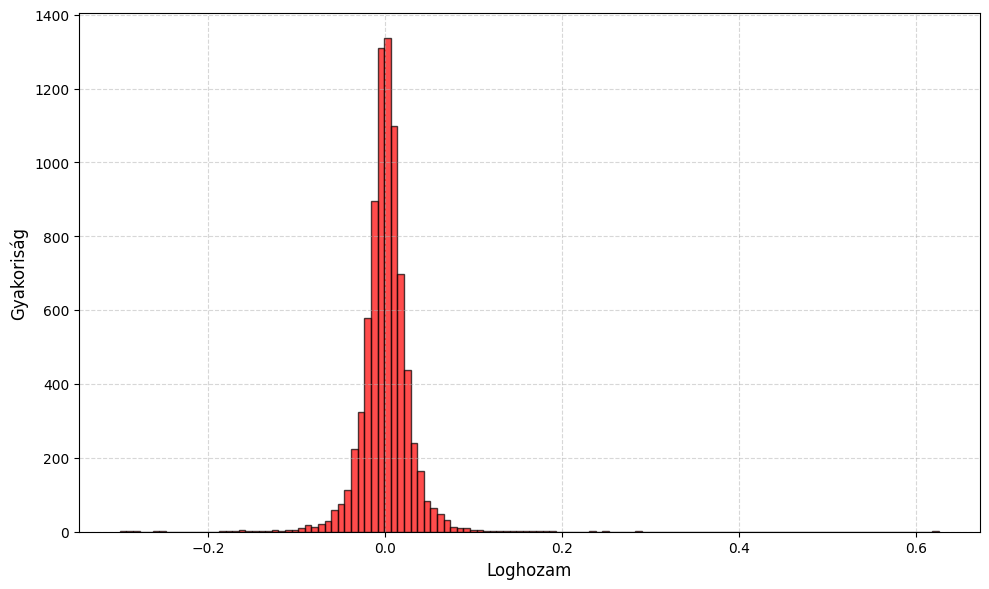

In [184]:
import matplotlib.pyplot as plt

# Visualizing Log Return Distribution
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(MS_df['Log_Returns'].dropna(), bins=bin_num_1, color='red', edgecolor='black', alpha=0.7)
plt.xlabel("Loghozam", fontsize=12)  # Add x-axis label with increased font size
plt.ylabel("Gyakoriság", fontsize=12)  # Use 'Frequency' for clarity
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a grid with a dashed line style
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


In [185]:
std=MS_df['Log_Returns'].dropna().std()
N=MS_df.shape[0]
bw=(3.5*std)/np.power(N, 1/3)
bin_num_2=int(MS_df['Log_Returns'].dropna().max()-MS_df['Log_Returns'].dropna().min()/bw)

Text(0.5, 1.0, 'MS Log Returns Distribution')

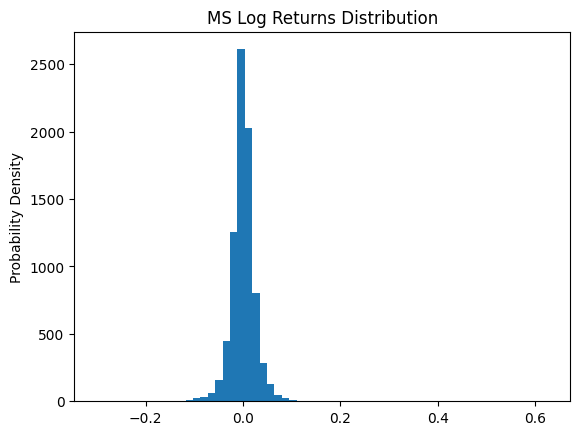

In [186]:
#Visualizing LogReturn Distribution
plt.hist(MS_df['Log_Returns'].dropna(), bins=bin_num_2, density=False)
plt.ylabel("Probability Density")
plt.title("Log Returns Distribution")
plt.title("MS Log Returns Distribution")

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Visualizing Fat Tails
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(
    MS_df['Log_Returns'].dropna(), 
    bins=100, 
    density=True,  # Use density=True for comparison with the normal density function
    range=[-0.2, -0.0001], 
    color='red', 
    edgecolor='black', 
    alpha=0.6, 
    label='Napi loghozamok eloszlása'
)

# Calculate mean and standard deviation
mu, sigma = MS_df['Log_Returns'].dropna().mean(), MS_df['Log_Returns'].dropna().std()

# Plot the normal density function
x_axis = np.arange(-0.2, -0.0001, 0.00001)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), color='navy', linewidth=2, label='Normális eloszlás sűrűségfüggvénye')

# Add labels and title
plt.xlabel("Loghozam", fontsize=12)
plt.ylabel("Sűrűség/Gyakoriság", fontsize=12)

# Add a legend
plt.legend(fontsize=10)

# Add a grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Adjust layout to fit all elements nicely
plt.tight_layout()
plt.show()


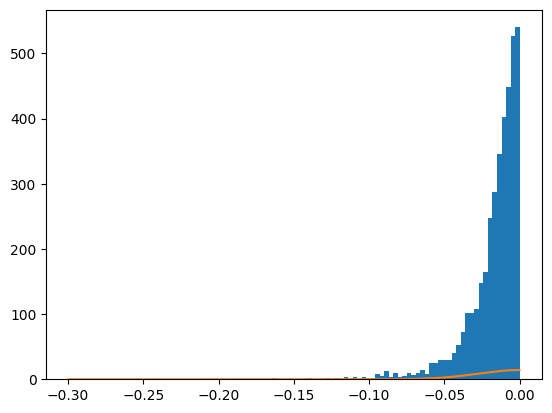

In [188]:
#Visualizing Fat Tails
plt.hist(MS_df['Log_Returns'].dropna(), bins=100, density=False,range=[MS_df['Log_Returns'].dropna().min(),-0.0001])

mu, sigma = MS_df['Log_Returns'].dropna().mean(), MS_df['Log_Returns'].dropna().std()

#Plot normal density function in a range
x_axis = np.arange(MS_df['Log_Returns'].dropna().min(), -0.0001, 0.00001)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma))

plt.show()

**Momentumok**

In [189]:
#Calcualte first moment
MS_df['Mean'] =MS_df['Log_Returns'].expanding(min_periods=1).mean()
MS_df.head()


Adj Close  Log_Returns      Mean
Date                                        
1993-02-23   3.561326          NaN       NaN
1993-02-24   3.661849     0.027835  0.027835
1993-02-25   3.748008     0.023256  0.025546
1993-02-26   3.805450     0.015210  0.022100
1993-03-01   3.676209    -0.034552  0.007937

In [190]:
import matplotlib.pyplot as plt

# Plot the first moment (Mean)
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability
plt.plot(MS_df['Mean'], color='red', linewidth=2, label='Átlag')  # Use red for the line and adjust thickness
plt.xlabel("Dátum", fontsize=12)  # Increase font size for x-axis label
plt.ylabel("Átlag", fontsize=12)  # Increase font size for y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a dashed grid for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-tick labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-tick font size
plt.legend(fontsize=10)  # Add a legend with a readable font size
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


In [191]:
#Calcualte second moment
MS_df['Var'] =MS_df['Log_Returns'].expanding(min_periods=1).var()
MS_df.head()

Adj Close  Log_Returns      Mean       Var
Date                                                  
1993-02-23   3.561326          NaN       NaN       NaN
1993-02-24   3.661849     0.027835  0.027835       NaN
1993-02-25   3.748008     0.023256  0.025546  0.000010
1993-02-26   3.805450     0.015210  0.022100  0.000041
1993-03-01   3.676209    -0.034552  0.007937  0.000830

In [192]:
import matplotlib.pyplot as plt

# Plot the second moment (Variance)
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability
plt.plot(MS_df['Var'], color='red', linewidth=2, label='Variancia')  # Use red for the line and adjust thickness
plt.xlabel("Dátum", fontsize=12)  # Increase font size for x-axis label
plt.ylabel("Variancia", fontsize=12)  # Increase font size for y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a dashed grid for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-tick labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-tick font size
plt.legend(fontsize=10)  # Add a legend with a readable font size
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


In [193]:
#Calculate third moment
MS_df['Skewness'] =MS_df['Log_Returns'].expanding(min_periods=1).skew()
MS_df.head()

Adj Close  Log_Returns      Mean       Var  Skewness
Date                                                            
1993-02-23   3.561326          NaN       NaN       NaN       NaN
1993-02-24   3.661849     0.027835  0.027835       NaN       NaN
1993-02-25   3.748008     0.023256  0.025546  0.000010       NaN
1993-02-26   3.805450     0.015210  0.022100  0.000041 -0.787154
1993-03-01   3.676209    -0.034552  0.007937  0.000830 -1.809296

In [194]:
import matplotlib.pyplot as plt

# Plot the third moment (Skewness)
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability
plt.plot(MS_df['Skewness'], color='red', linewidth=2, label='Ferdeség')  # Use red for the line and adjust thickness
plt.xlabel("Dátum", fontsize=12)  # Increase font size for x-axis label
plt.ylabel("Ferdeség", fontsize=12)  # Increase font size for y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a dashed grid for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-tick labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-tick font size
plt.legend(fontsize=10)  # Add a legend with a readable font size
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


Fisher vs. Pearson kurtózis

In [195]:
#Calculate Fischer and Pearson kurtosis
pearson=stats.kurtosis(MS_df['Log_Returns'].dropna(), fisher=False)
fisher=stats.kurtosis(MS_df['Log_Returns'].dropna(), fisher=True)
print(pearson)
print(fisher)
print(pearson-fisher)

47.72016984144348
44.72016984144348
3.0


In [196]:
#Calculate expanded Fischer kurtosis
MS_df['Kurtosis'] =MS_df['Log_Returns'].expanding(min_periods=1).kurt()
MS_df.head(10)

Adj Close  Log_Returns      Mean       Var  Skewness  Kurtosis
Date                                                                      
1993-02-23   3.561326          NaN       NaN       NaN       NaN       NaN
1993-02-24   3.661849     0.027835  0.027835       NaN       NaN       NaN
1993-02-25   3.748008     0.023256  0.025546  0.000010       NaN       NaN
1993-02-26   3.805450     0.015210  0.022100  0.000041 -0.787154       NaN
1993-03-01   3.676209    -0.034552  0.007937  0.000830 -1.809296  3.324698
1993-03-02   3.776731     0.026977  0.011745  0.000695 -2.047285  4.258274
1993-03-03   3.762371    -0.003809  0.009153  0.000596 -1.452186  1.512767
1993-03-04   3.748008    -0.003825  0.007299  0.000521 -1.083887  0.612997
1993-03-05   3.819811     0.018976  0.008759  0.000463 -1.295331  1.274610
1993-03-08   3.805450    -0.003767  0.007367  0.000423 -1.028464  0.734512

In [197]:
#Calculate expanded Pearson kurtosis
MS_df['Kurtosis']=MS_df['Kurtosis']+3
MS_df.head(10)

Adj Close  Log_Returns      Mean       Var  Skewness  Kurtosis
Date                                                                      
1993-02-23   3.561326          NaN       NaN       NaN       NaN       NaN
1993-02-24   3.661849     0.027835  0.027835       NaN       NaN       NaN
1993-02-25   3.748008     0.023256  0.025546  0.000010       NaN       NaN
1993-02-26   3.805450     0.015210  0.022100  0.000041 -0.787154       NaN
1993-03-01   3.676209    -0.034552  0.007937  0.000830 -1.809296  6.324698
1993-03-02   3.776731     0.026977  0.011745  0.000695 -2.047285  7.258274
1993-03-03   3.762371    -0.003809  0.009153  0.000596 -1.452186  4.512767
1993-03-04   3.748008    -0.003825  0.007299  0.000521 -1.083887  3.612997
1993-03-05   3.819811     0.018976  0.008759  0.000463 -1.295331  4.274610
1993-03-08   3.805450    -0.003767  0.007367  0.000423 -1.028464  3.734512

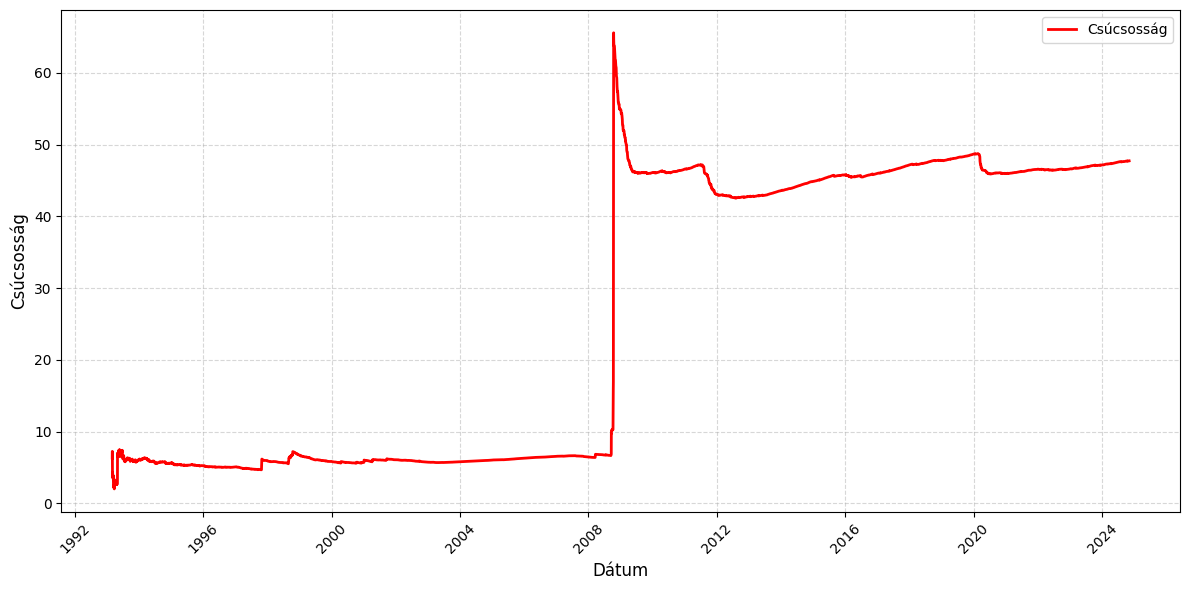

In [198]:
import matplotlib.pyplot as plt

# Plot the fourth moment (Kurtosis)
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability
plt.plot(MS_df['Kurtosis'], color='red', linewidth=2, label='Csúcsosság')  # Use red for the line and adjust thickness
plt.xlabel("Dátum", fontsize=12)  # Increase font size for x-axis label
plt.ylabel("Csúcsosság", fontsize=12)  # Increase font size for y-axis label
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add a dashed grid for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-tick labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-tick font size
plt.legend(fontsize=10)  # Add a legend with a readable font size
plt.tight_layout()  # Adjust layout to fit all elements nicely
plt.show()


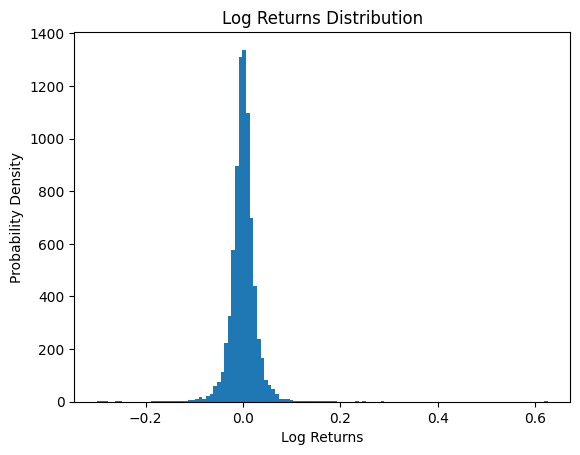

In [199]:
    #Visualizing LogReturn Distributions
plt.hist(MS_df['Log_Returns'].dropna(), bins=bin_num_1, density=False)
plt.xlabel("Log Returns")
plt.ylabel("Probability Density")
plt.title("Log Returns Distribution")
plt.show()

In [200]:
#Visualizing LogReturn Distributions with seaborn
sns.histplot(data=MS_df['Log_Returns'].dropna())
plt.xlabel("Log Returns")
plt.ylabel("Probability Density")
plt.title("Log Returns Distribution")

c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Log Returns Distribution')

**Normalitás tesztek:**

1) Jarque-Bera

In [201]:
normcoef_df=pd.DataFrame(columns=["Test","Test Statistics","p-value"])

In [202]:
jarque_bera_test = stats.jarque_bera(MS_df['Log_Returns'].dropna())
print(jarque_bera_test)
print("JB Test Statistics: ",jarque_bera_test.statistic)
print("JB p-value: ",'{0:.16f}'.format(jarque_bera_test.pvalue))

SignificanceResult(statistic=666650.7197346289, pvalue=0.0)
JB Test Statistics:  666650.7197346289
JB p-value:  0.0000000000000000


In [203]:
jarque_bera(MS_df['Log_Returns'].dropna())

(666650.7197346289, 0.0, 1.06871517538914, 47.72016984144348)

In [204]:
def chisquaretest(value,dof,confidency):
    critical = 1 - stats.chi2.cdf(JB, dof)
    if confidency >= critical:
        return ('Reject H0, P value= {0:.16f}'.format(critical))
    else:
        return ('Fail to reject H0, P value= {0:.16f}'.format(critical))

In [205]:
#Calculate Jarque–Bera (Fisher)
skew=MS_df['Log_Returns'].dropna().skew()
kurt=stats.kurtosis(MS_df['Log_Returns'].dropna(), fisher=True)
count=MS_df['Log_Returns'].dropna().count()
JB=(count/6)*(skew**2+(1/4)*(kurt-3)**2)
print("Kurtosis:" , kurt)
print("Jarque–Bera:" , JB)
#the value of the JB is compared with chi square distribution to get the p value
print(chisquaretest(JB,2,0.05))


Kurtosis: 44.72016984144348
Jarque–Bera: 580405.4420829393
Reject H0, P value= 0.0000000000000000


In [206]:
jb_fisher_df=pd.DataFrame({"Test":["Jarque-Bera (Fisher)"],
           "Test Statistics": JB,
           "p-value": 0.0000})
normcoef_df=pd.concat([normcoef_df,jb_fisher_df],ignore_index=True)
normcoef_df

C:\Users\Felhasználó\AppData\Local\Temp\ipykernel_4028\2607054791.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normcoef_df=pd.concat([normcoef_df,jb_fisher_df],ignore_index=True)


Test  Test Statistics  p-value
0  Jarque-Bera (Fisher)    580405.442083      0.0

In [207]:
#Calculate Jarque–Bera (Pearson)
#Pearson-ból szokták számolni!
skew=MS_df['Log_Returns'].dropna().skew()
kurt=stats.kurtosis(MS_df['Log_Returns'].dropna(), fisher=False)
count=MS_df['Log_Returns'].dropna().count()
JB=(count/6)*(skew**2+(1/4)*(kurt-3)**2)
print("Kurtosis:" , kurt)
print("Jarque–Bera:" , JB)

#the value of the JB is compared with chi square distribution to get the p value
print(chisquaretest(JB,2,0.05))

Kurtosis: 47.72016984144348
Jarque–Bera: 666651.2910015398
Reject H0, P value= 0.0000000000000000


In [208]:
jb_pearson_df=pd.DataFrame({"Test":["Jarque-Bera (Pearson)"],
           "Test Statistics": JB,
           "p-value": 0.0000})
normcoef_df=pd.concat([normcoef_df,jb_pearson_df],ignore_index=True)
normcoef_df

Test  Test Statistics  p-value
0   Jarque-Bera (Fisher)    580405.442083      0.0
1  Jarque-Bera (Pearson)    666651.291002      0.0

2) Kolmogorov-Smirnov test

In [209]:
#Kolmogorov–Smirnov test 
ks_test=stats.kstest(MS_df['Log_Returns'].dropna(), "norm")
print(ks_test)
# p érték Student-féle t-eloszlásból számolódik
print('{0:.16f}'.format(ks_test.pvalue))

KstestResult(statistic=0.46238812869770196, pvalue=0.0, statistic_location=0.07015578306436435, statistic_sign=1)
0.0000000000000000


In [210]:
ks_df=pd.DataFrame({"Test":["Kolmogorov-Smirnov"],
           "Test Statistics": ks_test[0],
           "p-value": ks_test[1]})
normcoef_df=pd.concat([normcoef_df,ks_df],ignore_index=True)
normcoef_df

Test  Test Statistics  p-value
0   Jarque-Bera (Fisher)    580405.442083      0.0
1  Jarque-Bera (Pearson)    666651.291002      0.0
2     Kolmogorov-Smirnov         0.462388      0.0

c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Log_Returns', ylabel='Proportion'>

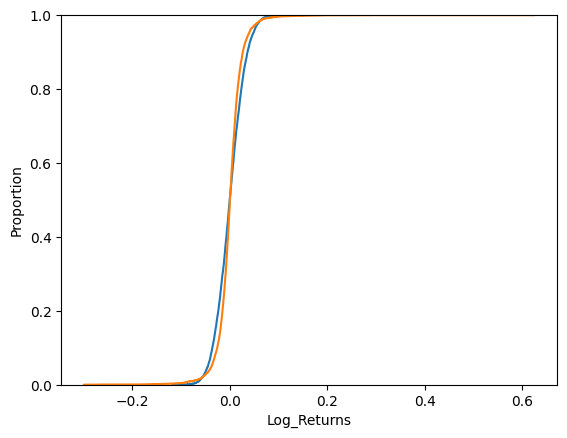

In [211]:
#plot empirical and hypothetic distribution
mu, sigma = MS_df['Log_Returns'].dropna().mean(), MS_df['Log_Returns'].dropna().std()
random = np.random.normal(mu, sigma, MS_df['Log_Returns'].dropna().count())
sns.ecdfplot(data=random,legend=True)
sns.ecdfplot(data=MS_df['Log_Returns'].dropna())

In [212]:
N=1000
returns_space = np.linspace(MS_df['Log_Returns'].dropna().min(), MS_df['Log_Returns'].dropna().max(), N)

#Convert list to DataFrame
Prob = pd.DataFrame(returns_space, columns=['x'])
Prob

x
0   -0.299658
1   -0.298732
2   -0.297805
3   -0.296879
4   -0.295952
..        ...
995  0.622144
996  0.623071
997  0.623997
998  0.624924
999  0.625850

[1000 rows x 1 columns]

In [213]:
MS_df[MS_df['Log_Returns'] < -0.17]

Adj Close  Log_Returns      Mean       Var  Skewness   Kurtosis
Date                                                                       
2008-09-17  15.308014    -0.277283  0.000372  0.000678 -0.225586   9.779708
2008-10-07  12.422364    -0.286264  0.000317  0.000724 -0.489540  12.971703
2008-10-09   8.762518    -0.299658  0.000229  0.000748 -0.794207  15.854592
2008-10-10   6.812945    -0.251659  0.000165  0.000763 -0.954847  16.944109
2008-10-15  12.919185    -0.178361  0.000327  0.000880  1.609516  63.836817
2008-10-27   9.783804    -0.184989  0.000256  0.000891  1.512111  62.514031
2008-12-01   8.087853    -0.262025  0.000206  0.000965  1.303529  56.655875
2009-01-20   9.334875    -0.174017  0.000240  0.000995  1.247049  53.515795

In [214]:
MS_df[MS_df['Log_Returns'] <-0.17].shape[0]

8

In [215]:
#Create new column with random value
Prob['P(X<x)']=0.0000
#Count Losses
N=MS_df['Log_Returns'].shape[0]
#Calcualte probability
for index,row in Prob.iterrows():
    #print( row['x'])
    bigger=MS_df[MS_df['Log_Returns'] < row['x']].shape[0]
    Prob['P(X<x)'][index]=bigger/N
Prob

C:\Users\Felhasználó\AppData\Local\Temp\ipykernel_4028\3822052489.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Prob['P(X<x)'][index]=bigger/N
C:\Users\Felhasználó\AppData\Local\Temp\ipykernel_4028\3822052489.py:9: FutureWarning: Chain

x    P(X<x)
0   -0.299658  0.000000
1   -0.298732  0.000125
2   -0.297805  0.000125
3   -0.296879  0.000125
4   -0.295952  0.000125
..        ...       ...
995  0.622144  0.999749
996  0.623071  0.999749
997  0.623997  0.999749
998  0.624924  0.999749
999  0.625850  0.999749

[1000 rows x 2 columns]

In [216]:
Prob['Normal'] = norm.cdf(Prob['x'], loc=mu, scale=sigma)

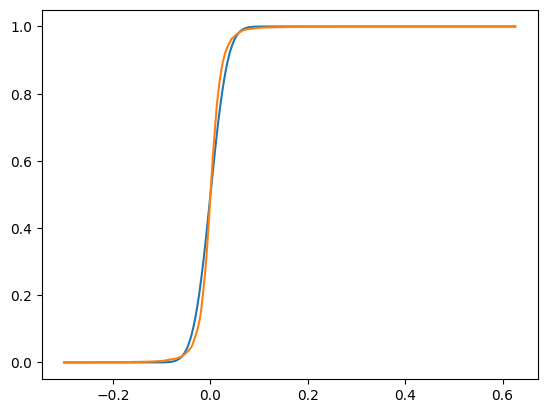

In [217]:
plt.plot(Prob['x'],Prob['Normal'])
plt.plot(Prob['x'],Prob['P(X<x)'])

In [218]:
Prob['Distance']=np.abs(Prob['Normal']-Prob['P(X<x)'])
Prob

x    P(X<x)        Normal      Distance
0   -0.299658  0.000000  3.709960e-27  3.709960e-27
1   -0.298732  0.000125  5.306297e-27  1.252662e-04
2   -0.297805  0.000125  7.581260e-27  1.252662e-04
3   -0.296879  0.000125  1.081979e-26  1.252662e-04
4   -0.295952  0.000125  1.542495e-26  1.252662e-04
..        ...       ...           ...           ...
995  0.622144  0.999749  1.000000e+00  2.505324e-04
996  0.623071  0.999749  1.000000e+00  2.505324e-04
997  0.623997  0.999749  1.000000e+00  2.505324e-04
998  0.624924  0.999749  1.000000e+00  2.505324e-04
999  0.625850  0.999749  1.000000e+00  2.505324e-04

[1000 rows x 4 columns]

In [219]:
Prob = Prob.sort_values(by='Distance', ascending=False)
Prob

x    P(X<x)        Normal      Distance
303 -0.018948  0.152324  2.441332e-01  9.180952e-02
305 -0.017096  0.174245  2.653875e-01  9.114225e-02
302 -0.019875  0.142929  2.338607e-01  9.093199e-02
304 -0.018022  0.164224  2.546442e-01  9.042026e-02
307 -0.015243  0.197169  2.875426e-01  9.037366e-02
..        ...       ...           ...           ...
12  -0.288541  0.000125  2.530797e-25  1.252662e-04
14  -0.286688  0.000125  5.038402e-25  1.252662e-04
1   -0.298732  0.000125  5.306297e-27  1.252662e-04
387  0.058872  0.981586  9.816568e-01  7.096990e-05
0   -0.299658  0.000000  3.709960e-27  3.709960e-27

[1000 rows x 4 columns]

In [220]:
# Calculate the p-value using the Kolmogorov-Smirnov distribution
n = MS_df['Log_Returns'].shape[0]
p_value = 1 - ksone.cdf(Prob['Distance'].max(), n)
p_value

0.0

In [221]:
stat, p_value  = stats.shapiro(MS_df['Log_Returns'].dropna())
# Eredmények
print(f'Statistic: {stat}, P-value: {p_value}')

Statistic: 0.8371196389198303, P-value: 0.0


c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [222]:
sw_df=pd.DataFrame({"Test":["Shapiro-Wilk"],
           "Test Statistics": stat,
           "p-value": p_value})
normcoef_df=pd.concat([normcoef_df,sw_df],ignore_index=True)
normcoef_df

Test  Test Statistics  p-value
0   Jarque-Bera (Fisher)    580405.442083      0.0
1  Jarque-Bera (Pearson)    666651.291002      0.0
2     Kolmogorov-Smirnov         0.462388      0.0
3           Shapiro-Wilk         0.837120      0.0

**QQ-plot**

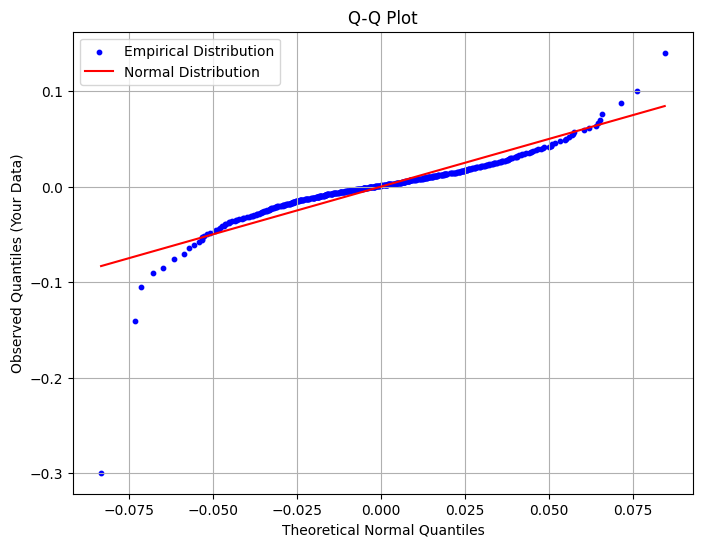

In [223]:
sorted_data = np.sort(MS_df['Log_Returns'].dropna())
mu=MS_df['Log_Returns'].dropna().mean()
std=MS_df['Log_Returns'].dropna().std()
expected_quantiles = np.percentile(sorted_data, np.arange(0, 100, 0.2))
theoretical_quantiles = np.percentile(np.random.normal(mu, std, 1000), np.arange(0, 100, 0.2))

plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, expected_quantiles, color='blue', marker='o', s=10, label='Empirical Distribution')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', label='Normal Distribution')
plt.xlabel('Theoretical Normal Quantiles')
plt.ylabel('Observed Quantiles (Your Data)')
plt.title('Q-Q Plot')
plt.legend()
plt.grid()
plt.show()

In [224]:
stats.probplot(MS_df['Log_Returns'].dropna(), dist="norm", plot=plt)

((array([-3.7545257 , -3.52620893, -3.40071176, ...,  3.40071176,
          3.52620893,  3.7545257 ]),
  array([-0.29965818, -0.28626407, -0.27728331, ...,  0.25233222,
          0.28618889,  0.62585023])),
 (0.0255742641317652, 0.0004365651882686572, 0.9140095898747712))

In [225]:
#better Q-Q plot
plt.figure(figsize=(6,6))
ax = pg.qqplot(MS_df['Log_Returns'].dropna(), dist='norm')
plt.xlabel("Elméleti kvantilisek")
plt.ylabel("Empirikus kvantilisek")
plt.show()

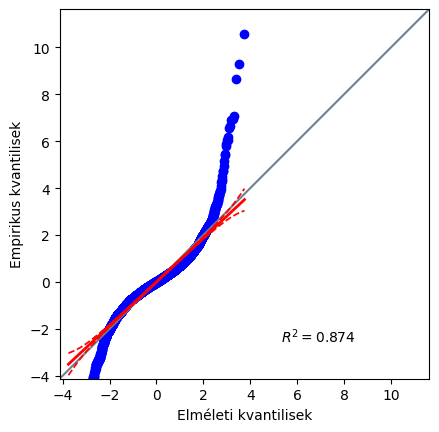

In [226]:
#kiugro adat kiszedese

ninetynine=np.max(MS_df["Log_Returns"])
first=np.percentile(MS_df["Log_Returns"],1)
screened_log_returns=MS_df.loc[MS_df["Log_Returns"]<ninetynine]["Log_Returns"]
ax = pg.qqplot(screened_log_returns.dropna(), dist='norm')
plt.xlabel("Elméleti kvantilisek")
plt.ylabel("Empirikus kvantilisek")
plt.show()

**Autocorrelation and high frequency normality test**

Autocorrelation of Log_Returns= 0.00019402856025253916


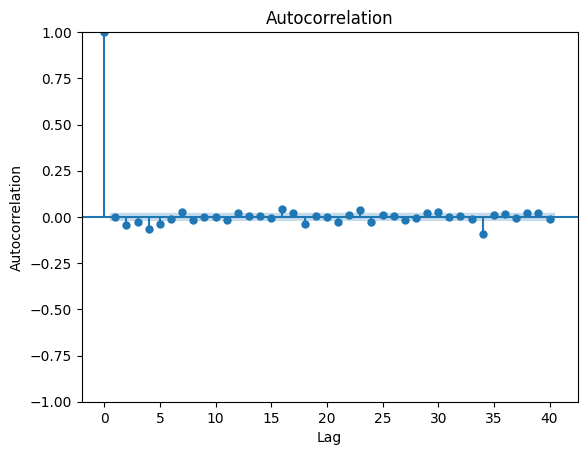

In [227]:
#Autocorrelation of Log_Returns
print('Autocorrelation of Log_Returns=',MS_df['Log_Returns'].dropna().autocorr(lag=1))
plot_acf(MS_df['Log_Returns'].dropna().dropna())
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

In [228]:
df_minute=pd.read_excel('MS_price.xlsx',sheet_name='1min')
df_tenmin=pd.read_excel("MS_price.xlsx",sheet_name='10min')
df_hour=pd.read_excel("MS_price.xlsx",sheet_name="60min")

In [229]:
df_minute.shape,df_tenmin.shape,df_hour.shape

((3899, 4), (4589, 4), (1701, 4))

In [230]:
df_tenmin.head()

Date  Last Price  Volume  SMAVG (15)
0 2024-10-23 22:50:00      118.28  302778     54039.0
1 2024-10-23 22:40:00      118.01   60158     35793.0
2 2024-10-23 22:30:00      117.95   53346     34677.0
3 2024-10-23 22:20:00      118.01   42418     32868.0
4 2024-10-23 22:10:00      118.05   32418     31678.0

In [231]:
df_tenmin.head()

Date  Last Price  Volume  SMAVG (15)
0 2024-10-23 22:50:00      118.28  302778     54039.0
1 2024-10-23 22:40:00      118.01   60158     35793.0
2 2024-10-23 22:30:00      117.95   53346     34677.0
3 2024-10-23 22:20:00      118.01   42418     32868.0
4 2024-10-23 22:10:00      118.05   32418     31678.0

In [232]:
df_hour.head()

Date  Last Price  Volume  SMAVG (15)
0 2024-10-23 22:30:00    118.2800  416282    323682.0
1 2024-10-23 21:30:00    118.0100  188782    314871.0
2 2024-10-23 20:30:00    117.5250  205518    325320.0
3 2024-10-23 19:30:00    117.7100  192299    325872.0
4 2024-10-23 18:30:00    118.2135  293125    333761.0

In [233]:
df_minute.dropna(subset = ['Last Price'], inplace=True)
df_tenmin.dropna(subset = ['Last Price'], inplace=True)
df_hour.dropna(subset = ['Last Price'], inplace=True)

In [234]:
df_minute['Log_Returns'] = np.log(df_minute["Last Price"]/df_minute["Last Price"].shift(1))
df_minute = df_minute[['Date', 'Last Price', 'Log_Returns']]  # Ensure 'Date' is in the DataFrame
df_minute.head()

Date  Last Price  Log_Returns
0 2024-10-23 22:59:00     118.280          NaN
1 2024-10-23 22:58:00     118.200    -0.000677
2 2024-10-23 22:57:00     118.115    -0.000719
3 2024-10-23 22:56:00     118.020    -0.000805
4 2024-10-23 22:55:00     118.010    -0.000085

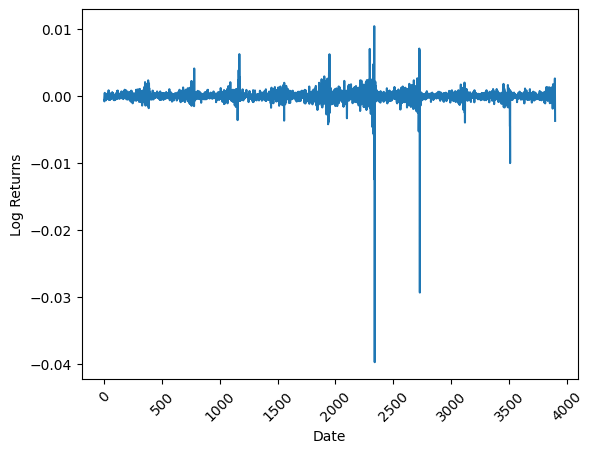

In [235]:
#plot Log_Returns
plt.plot(df_minute['Log_Returns'].dropna())
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.xticks(rotation=45)
plt.show()

Autocorrelation of Log_Returns= -0.05122214135568272


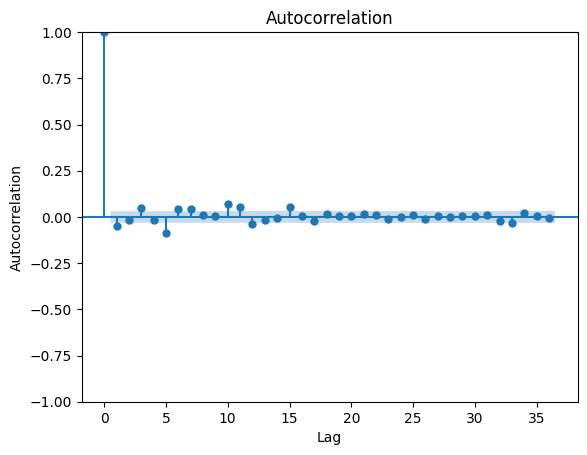

In [236]:
#Autocorrelation of Log_Returns
print('Autocorrelation of Log_Returns=',df_minute['Log_Returns'].dropna().autocorr(lag=1))
plot_acf(df_minute['Log_Returns'].dropna().dropna())
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

In [237]:
plt.hist(df_minute['Log_Returns'].dropna(), bins=30, density=False)
plt.ylabel("Probability Density")


Text(0, 0.5, 'Probability Density')

In [238]:
jarque_bera_test = stats.jarque_bera(df_minute['Log_Returns'].dropna())
print(jarque_bera_test)

SignificanceResult(statistic=52383203.75070023, pvalue=0.0)


In [239]:
stat, p_value  = stats.shapiro(df_minute['Log_Returns'].dropna())
# Eredmények
print(f'Statistic: {stat}, P-value: {p_value}')

Statistic: 0.4277880787849426, P-value: 0.0


10 perces eltolas

In [240]:
df_tenmin['Log_Returns'] = np.log(df_tenmin["Last Price"]/df_tenmin["Last Price"].shift(1))
df_tenmin = df_tenmin[['Date', 'Last Price', 'Log_Returns']]  # Ensure 'Date' is in the DataFrame
df_tenmin.head()

Date  Last Price  Log_Returns
0 2024-10-23 22:50:00      118.28          NaN
1 2024-10-23 22:40:00      118.01    -0.002285
2 2024-10-23 22:30:00      117.95    -0.000509
3 2024-10-23 22:20:00      118.01     0.000509
4 2024-10-23 22:10:00      118.05     0.000339

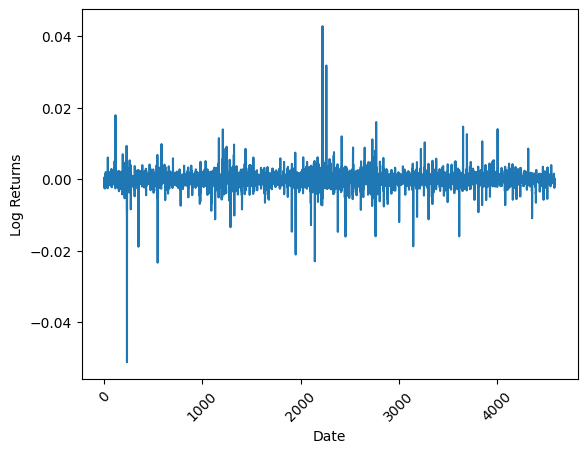

In [241]:
#plot Log_Returns
plt.plot(df_tenmin['Log_Returns'].dropna())
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.xticks(rotation=45)
plt.show()

In [242]:
#Autocorrelation of Log_Returns
print('Autocorrelation of Log_Returns=',df_tenmin['Log_Returns'].dropna().autocorr(lag=1))
plot_acf(df_tenmin['Log_Returns'].dropna().dropna())
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

Autocorrelation of Log_Returns= 0.029509293306769307


In [243]:
plt.hist(df_tenmin['Log_Returns'].dropna(), bins=30, density=False)
plt.ylabel("Probability Density")


Text(0, 0.5, 'Probability Density')

In [244]:
jarque_bera_test = stats.jarque_bera(df_tenmin['Log_Returns'].dropna())
print(jarque_bera_test)

SignificanceResult(statistic=1309730.2569619974, pvalue=0.0)


In [245]:
stat, p_value  = stats.shapiro(df_tenmin['Log_Returns'].dropna())
# Eredmények
print(f'Statistic: {stat}, P-value: {p_value}')

Statistic: 0.7140144109725952, P-value: 0.0


Egy oras eltolas

In [246]:
df_hour['Log_Returns'] = np.log(df_hour["Last Price"]/df_hour["Last Price"].shift(1))
df_hour = df_hour[['Date', 'Last Price', 'Log_Returns']]  # Ensure 'Date' is in the DataFrame
df_hour.head()

Date  Last Price  Log_Returns
0 2024-10-23 22:30:00    118.2800          NaN
1 2024-10-23 21:30:00    118.0100    -0.002285
2 2024-10-23 20:30:00    117.5250    -0.004118
3 2024-10-23 19:30:00    117.7100     0.001573
4 2024-10-23 18:30:00    118.2135     0.004268

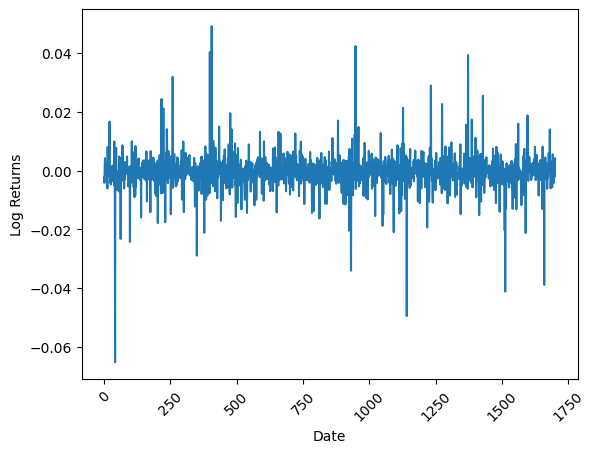

In [247]:
#plot Log_Returns
plt.plot(df_hour['Log_Returns'].dropna())
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.xticks(rotation=45)
plt.show()

Autocorrelation of Log_Returns= -0.02340167466955374


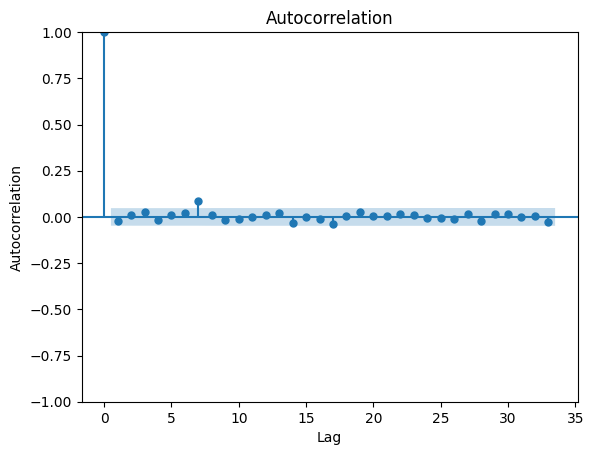

In [248]:
#Autocorrelation of Log_Returns
print('Autocorrelation of Log_Returns=',df_hour['Log_Returns'].dropna().autocorr(lag=1))
plot_acf(df_hour['Log_Returns'].dropna().dropna())
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

Text(0, 0.5, 'Probability Density')

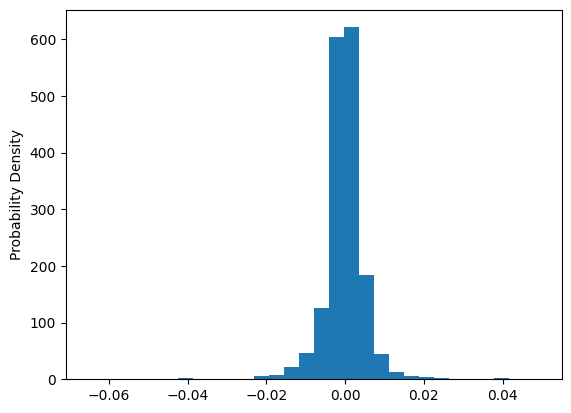

In [249]:
plt.hist(df_hour['Log_Returns'].dropna(), bins=30, density=False)
plt.ylabel("Probability Density")


In [250]:
jarque_bera_test = stats.jarque_bera(df_hour['Log_Returns'].dropna())
print(jarque_bera_test)

SignificanceResult(statistic=38553.97924028664, pvalue=0.0)


In [251]:
stat, p_value  = stats.shapiro(df_hour['Log_Returns'].dropna())
# Eredmények
print(f'Statistic: {stat}, P-value: {p_value}')

Statistic: 0.7836395502090454, P-value: 9.72501134241423e-43


**Volatilitás klasztereződés**

Heteroszkedaszticitás

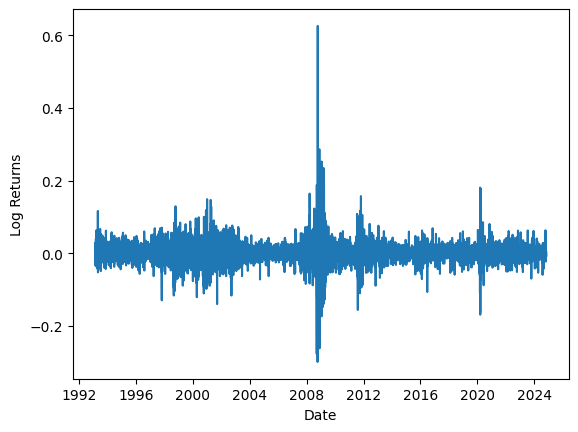

In [252]:
#plot Log_Returns
plt.plot(MS_df['Log_Returns'])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.show()

**Volatilitás klasztereződés**

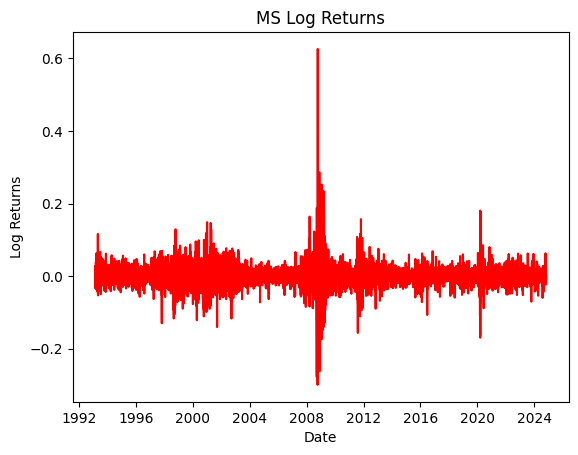

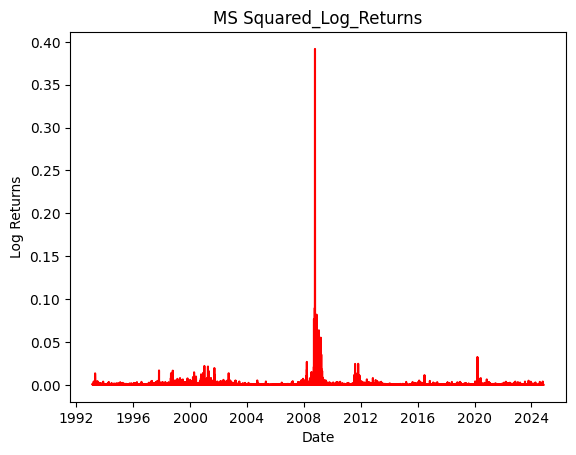

In [253]:
#plot volatility clustering
plt.plot(MS_df['Log_Returns'],color="r")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("MS Log Returns")
plt.show()

MS_df['Squared_Log_Returns']=MS_df['Log_Returns'].pow(2)

plt.plot(MS_df['Squared_Log_Returns'],color="r")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("MS Squared_Log_Returns")
plt.show()

MS_df['Absolute_Value_of_Log_Returns']=MS_df['Log_Returns'].abs()

plt.plot(MS_df['Absolute_Value_of_Log_Returns'],color="r")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title('The Absolute Value of Log_Returns')
plt.show()

In [254]:
print('Autocorrelation of Log_Returns=',MS_df['Log_Returns'][1:].autocorr(lag=1))
print('Autocorrelation of Squared_Log_Returns=',MS_df['Squared_Log_Returns'][1:].autocorr(lag=1))
print('Autocorrelation of Absolute_Value_of_Log_Returns=',MS_df['Absolute_Value_of_Log_Returns'][1:].autocorr(lag=1))

Autocorrelation of Log_Returns= 0.00019402856025253916
Autocorrelation of Squared_Log_Returns= 0.25511904207480085
Autocorrelation of Absolute_Value_of_Log_Returns= 0.35471686571280303


In [255]:
#Autocorrelation of Log_Returns
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
plot_acf(MS_df['Log_Returns'][1:].dropna(),lags=20,ax=ax,color="r")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("MS Log_Returns Autocorrelation")


#Autocorrelation of Squared_Log_Returns
ax=plt.subplot(2,2,2)
plot_acf(MS_df['Squared_Log_Returns'][1:].dropna(),lags=20,ax=ax,color="r")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("MS Log_Returns on Second Autocorrelation")

#Autocorrelation of Absolute_Value_of_Log_Returns
ax=plt.subplot(2,2,3)
plot_acf(MS_df['Absolute_Value_of_Log_Returns'][1:].dropna(),lags=20,ax=ax,color="r")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("MS Absolute_Value_of_Log_Returns Autocorrelation")
plt.show()

In [256]:
squared_results = sm.stats.acorr_ljungbox(MS_df['Squared_Log_Returns'][1:].dropna(), lags=[1], return_df=True)
absolute_results = sm.stats.acorr_ljungbox(MS_df['Absolute_Value_of_Log_Returns'][1:].dropna(), lags=[1], return_df=True)
squared_results = squared_results[['lb_stat', 'lb_pvalue']].rename(columns={'lb_stat': 'Statisztika', 'lb_pvalue': 'p-érték'})
absolute_results = absolute_results[['lb_stat', 'lb_pvalue']].rename(columns={'lb_stat': 'Statisztika', 'lb_pvalue': 'p-érték'})
combined_results = pd.concat([squared_results, absolute_results], keys=['Négyzetes', 'Abszolút értékes'])
combined_results.reset_index(level=0, inplace=True)
combined_results.rename(columns={'level_0': 'Módszer'}, inplace=True)
print(combined_results)

            Módszer  Statisztika        p-érték
1         Négyzetes   519.708280  4.897895e-115
1  Abszolút értékes  1004.641096  1.759792e-220


In [257]:
import pandas as pd
result = engle(MS_df['Squared_Log_Returns'][1:].dropna(), nlags=1)

# Create a DataFrame with the results
engle_df = pd.DataFrame({
    'Tesztstatisztika': [result[0]],  # Assuming the first element is the statistic
    'P-value': [result[1]]     # Assuming the second element is the p-value
})

# Display the DataFrame
print(engle_df)


   Tesztstatisztika   P-value
0         10.434012  0.001237


Feltételes heteroszkedaszticitás tesztek

In [258]:
#Ljung-Box test of autocorrelation in residuals.
#H0: The data are independent in time
sm.stats.acorr_ljungbox(MS_df['Squared_Log_Returns'][1:].dropna(), lags=[1], return_df=True)

lb_stat      lb_pvalue
1  519.70828  4.897895e-115

In [259]:
#Ljung-Box test of autocorrelation in residuals.
#H0: The data are independent in time
sm.stats.acorr_ljungbox(MS_df['Absolute_Value_of_Log_Returns'][1:].dropna(), lags=[1], return_df=True)

lb_stat      lb_pvalue
1  1004.641096  1.759792e-220

In [260]:
#Engle ARCH LM test 
#last is the p value in the tuple
result=engle(MS_df['Squared_Log_Returns'][1:].dropna(),nlags=1)
print(result)
print("P-value=", result[1])

(10.434012066072077, 0.0012371570536416972, 10.44505276052131, 0.0012347774418524108)
P-value= 0.0012371570536416972


**Menetelés a normális eloszláshoz**

Jobb ötlet híján kiplotolom a QQ-plotját a napi, 60 perces, 10 perces, 1 perces loghozamoknak

In [261]:
from scipy.stats import linregress

plt.figure(figsize=(10, 10))  # Increase figure size for better spacing
lst = [MS_df["Log_Returns"], df_hour["Log_Returns"], df_tenmin["Log_Returns"], df_minute["Log_Returns"]]
names = ["Napi", "1 óra", "10 perc", "1 perc"]

r_squared_values = {}

for i in range(len(lst)):
    plt.subplot(2, 2, i + 1)
    ax = pg.qqplot(lst[i].dropna(), dist='norm')
    plt.title(f"{names[i]}", fontsize=12)  # Increase title font size
    sample_quantiles = np.sort(lst[i].dropna())
    theoretical_quantiles = np.sort(norm.ppf((np.arange(1, len(lst[i].dropna()) + 1) - 0.5) / len(lst[i].dropna())))
    
    # Calculate linear regression and R^2 value
    slope, intercept, r_value, p_value, std_err = linregress(theoretical_quantiles, sample_quantiles)
    
    # Store R^2 value
    r_squared_values[names[i]] = r_value**2
    
plt.show()

In [262]:
r_squared_df = pd.DataFrame(list(r_squared_values.items()), columns=['Frekvencia', 'R^2'])
print(r_squared_df)

  Frekvencia       R^2
0       Napi  0.836258
1      1 óra  0.781721
2    10 perc  0.712205
3     1 perc  0.425606


shapiro wilk test a 4 frekvenciára

In [263]:
import pandas as pd
from scipy import stats

# Initialize an empty dictionary for storing the Shapiro-Wilk test statistic and p-value
sw_scores = {}

# Assuming lst and names are already defined
for i in range(len(lst)):
    stat, p_value = stats.shapiro(lst[i].dropna())
    sw_scores[names[i]] = (stat, p_value)

# Create a DataFrame with the results
sw_scores_df = pd.DataFrame(
    [(name, stat, p_value) for name, (stat, p_value) in sw_scores.items()],
    columns=['Frekvencia', 'Tesztstatisztika', 'p-érték']
)
sw_scores_df['p-érték'] = (sw_scores_df['p-érték'] * 100).map("{:.2f}%".format)
print(sw_scores_df)


  Frekvencia  Tesztstatisztika p-érték
0       Napi          0.837120   0.00%
1      1 óra          0.783640   0.00%
2    10 perc          0.714014   0.00%
3     1 perc          0.427788   0.00%


c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [264]:
squared_results = sm.stats.acorr_ljungbox(MS_df['Squared_Log_Returns'][1:].dropna(), lags=[1], return_df=True)
absolute_results = sm.stats.acorr_ljungbox(MS_df['Absolute_Value_of_Log_Returns'][1:].dropna(), lags=[1], return_df=True)
squared_results = squared_results[['lb_stat', 'lb_pvalue']].rename(columns={'lb_stat': 'Statisztika', 'lb_pvalue': 'p-érték'})
absolute_results = absolute_results[['lb_stat', 'lb_pvalue']].rename(columns={'lb_stat': 'Statisztika', 'lb_pvalue': 'p-érték'})
combined_results = pd.concat([squared_results, absolute_results], keys=['Négyzetes', 'Abszolút értékes'])
combined_results.reset_index(level=0, inplace=True)
combined_results.rename(columns={'level_0': 'Módszer'}, inplace=True)
print(combined_results)

            Módszer  Statisztika        p-érték
1         Négyzetes   519.708280  4.897895e-115
1  Abszolút értékes  1004.641096  1.759792e-220


**Aggregált leíró Statisztika**

In [265]:
def aggregate_descriptive_stats(col):
    
    # Calculate descriptive statistics
    stats = {
        'Adatszám': col.count(),
        'Átlag': col.mean(),
        'Variancia': col.var(),
        'Min': col.min(),
        '25. Percentilis': col.quantile(0.25),
        'Medián': col.median(),
        '75. Percentilis': col.quantile(0.75),
        'Max': col.max(),
        'Terjedelem': col.max() - col.min(),
        'Ferdeség': col.skew(),
        'Csúcsosság': col.kurt(),
    }
    
    return stats

In [266]:
MS_aggreg_stats=aggregate_descriptive_stats(MS_df["Log_Returns"].dropna())
MS_aggreg_stats

{'Adatszám': 7982,
 'Átlag': 0.00043656518826865683,
 'Variancia': 0.0007823090906308791,
 'Min': -0.2996581779847696,
 '25. Percentilis': -0.011605095082839613,
 'Medián': 0.0002547091524245285,
 '75. Percentilis': 0.012570074588643437,
 'Max': 0.6258502296294389,
 'Terjedelem': 0.9255084076142086,
 'Ferdeség': 1.0689160596028875,
 'Csúcsosság': 44.74894768493024}

**Autokorreláció**

In [267]:
freqs = [MS_df["Log_Returns"],
         df_hour["Log_Returns"],
         df_tenmin["Log_Returns"],
         df_minute["Log_Returns"]]
names = ["Napi", "1 óra", '10 perc', '1 perc']
signs = [0.01, 0.05, 0.1]

plt.figure(figsize=(15,15))
k=1
for i in range(len(freqs)):
    for j in signs:
        ax=plt.subplot(4,3,k)
        plot_acf(freqs[i].dropna(), alpha=j,lags=5,ax=ax,color="r")
        plt.title(f"{names[i]}({j})")
        
        k+=1


plt.show()


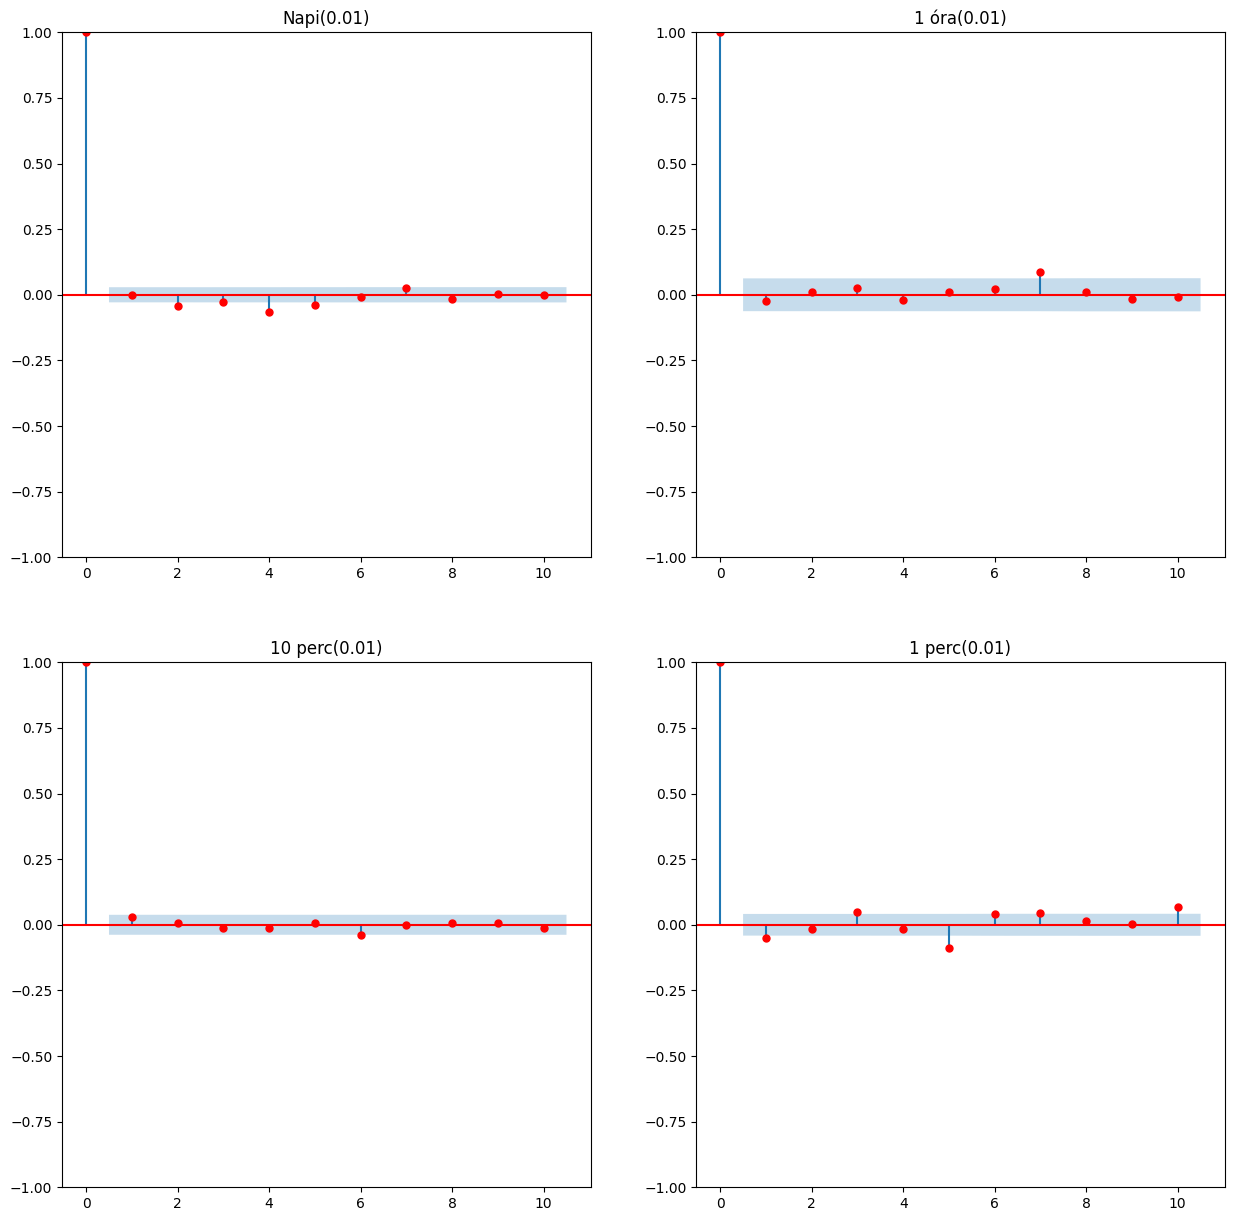

In [268]:
freqs = [MS_df["Log_Returns"],
         df_hour["Log_Returns"],
         df_tenmin["Log_Returns"],
         df_minute["Log_Returns"]]
names = ["Napi", "1 óra", '10 perc', '1 perc']
signs = [0.01, 0.05, 0.1]

plt.figure(figsize=(15,15))
k=1
for i in range(len(freqs)):
    ax=plt.subplot(2,2,k)
    plot_acf(freqs[i].dropna(), alpha=signs[0],lags=10,ax=ax,color="r")
    plt.title(f"{names[i]}({signs[0]})")
    
    k+=1


plt.show()


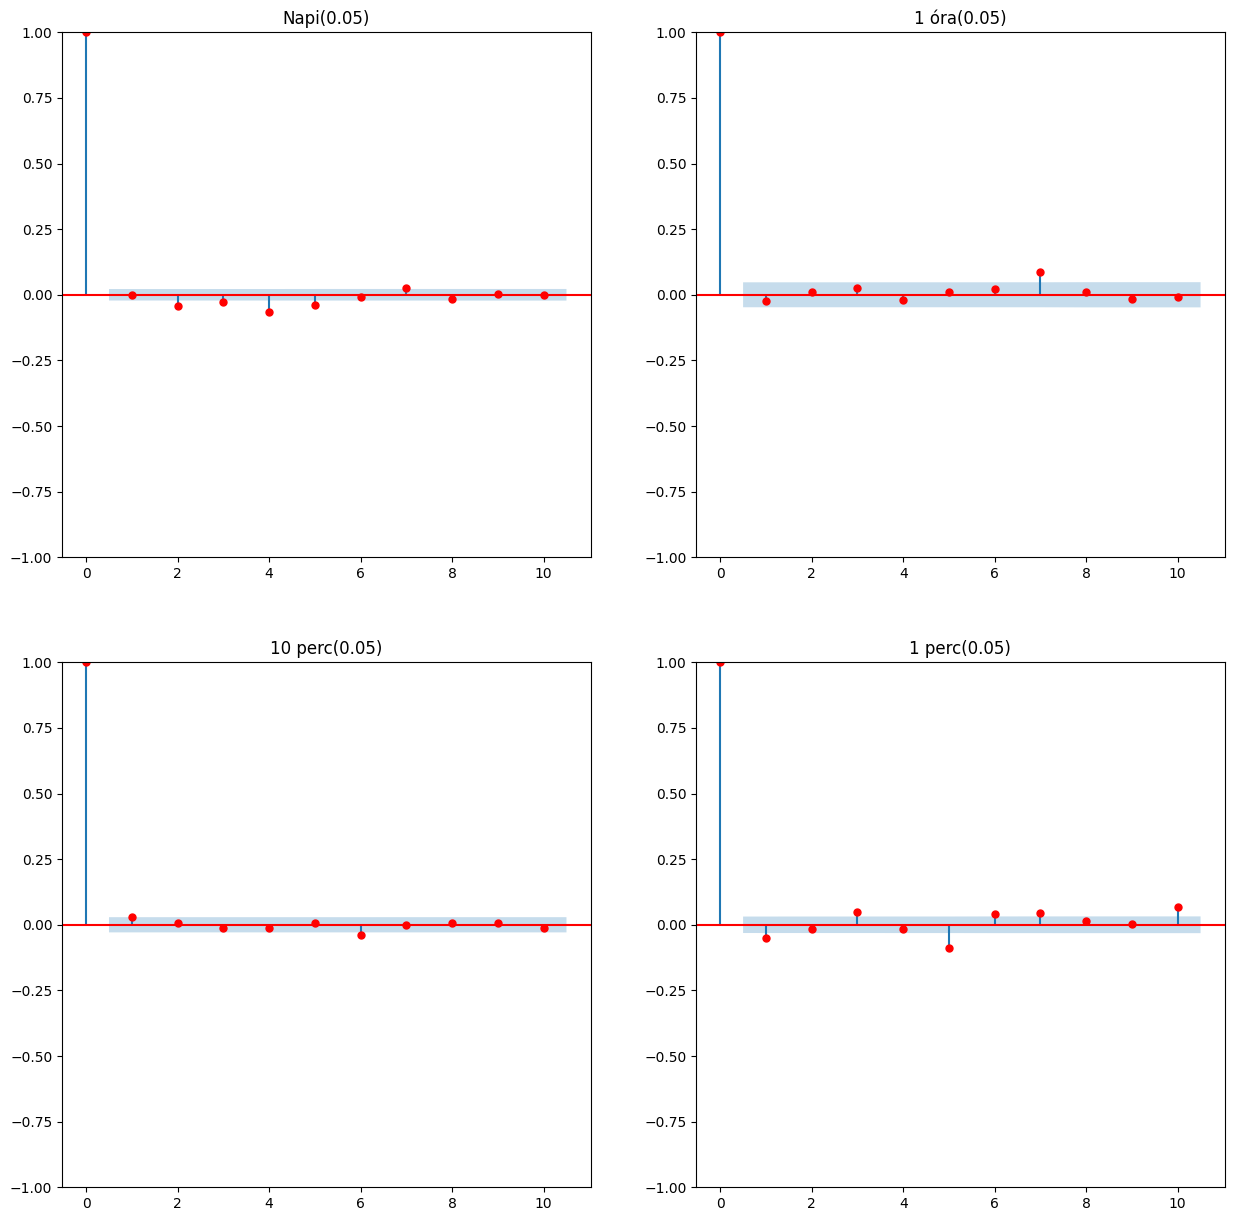

In [269]:
freqs = [MS_df["Log_Returns"],
         df_hour["Log_Returns"],
         df_tenmin["Log_Returns"],
         df_minute["Log_Returns"]]
names = ["Napi", "1 óra", '10 perc', '1 perc']
signs = [0.01, 0.05, 0.1]

plt.figure(figsize=(15,15))
k=1
for i in range(len(freqs)):
    ax=plt.subplot(2,2,k)
    plot_acf(freqs[i].dropna(), alpha=signs[1],lags=10,ax=ax,color="r")
    plt.title(f"{names[i]}({signs[1]})")
    
    k+=1


plt.show()


In [270]:
freqs = [MS_df["Log_Returns"],
         df_hour["Log_Returns"],
         df_tenmin["Log_Returns"],
         df_minute["Log_Returns"]]
names = ["Napi", "1 óra", '10 perc', '1 perc']
signs = [0.01, 0.05, 0.1]

plt.figure(figsize=(15,15))
k=1
for i in range(len(freqs)):
    ax=plt.subplot(2,2,k)
    plot_acf(freqs[i].dropna(), alpha=signs[2],lags=10,ax=ax,color="r")
    plt.title(f"{names[i]}({signs[2]})")
    
    k+=1


plt.show()


**SP100 feladat**

In [271]:
resp = requests.get('https://en.wikipedia.org/wiki/S%26P_100')
soup = bs.BeautifulSoup(resp.text, 'lxml') #lxml engine to analyze HTML webpage
table = soup.find('table', {'class': 'wikitable sortable'})
table

<table class="wikitable sortable" id="constituents">
<tbody><tr>
<th>Symbol
</th>
<th>Name
</th>
<th>Sector
</th></tr>
<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ABBV
</td>
<td><a href="/wiki/AbbVie" title="AbbVie">AbbVie</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ABT
</td>
<td><a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">Abbott Laboratories</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ACN
</td>
<td><a href="/wiki/Accenture" title="Accenture">Accenture</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ADBE
</td>
<td><a href="/wiki/Adobe_Inc." title="Adobe Inc.">Adobe Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>AIG
</td>
<td><a href="/wiki/American_International_Group" title="American International Group">American International Group</a>
</td>
<td>Financials
</td></tr>
<tr>
<td>AMD
</td>
<td><a href="/wiki/AMD" title="AMD">Advanced Micro Devices<

In [272]:
#A <tr> elem a HTML-ben egy táblázat sorát jelöli.
table.findAll('tr')[1:]

[<tr>
 <td>AAPL
 </td>
 <td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
 </td>
 <td>Information Technology
 </td></tr>,
 <tr>
 <td>ABBV
 </td>
 <td><a href="/wiki/AbbVie" title="AbbVie">AbbVie</a>
 </td>
 <td>Health Care
 </td></tr>,
 <tr>
 <td>ABT
 </td>
 <td><a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">Abbott Laboratories</a>
 </td>
 <td>Health Care
 </td></tr>,
 <tr>
 <td>ACN
 </td>
 <td><a href="/wiki/Accenture" title="Accenture">Accenture</a>
 </td>
 <td>Information Technology
 </td></tr>,
 <tr>
 <td>ADBE
 </td>
 <td><a href="/wiki/Adobe_Inc." title="Adobe Inc.">Adobe Inc.</a>
 </td>
 <td>Information Technology
 </td></tr>,
 <tr>
 <td>AIG
 </td>
 <td><a href="/wiki/American_International_Group" title="American International Group">American International Group</a>
 </td>
 <td>Financials
 </td></tr>,
 <tr>
 <td>AMD
 </td>
 <td><a href="/wiki/AMD" title="AMD">Advanced Micro Devices</a>
 </td>
 <td>Information Technology
 </td></tr>,
 <tr>
 <td>AMGN

In [273]:
sample=table.findAll('tr')[1:][0]
sample

<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>

In [274]:
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    ticker=ticker.rstrip('\n')
    tickers.append(ticker)

In [275]:
length=len(tickers)
for i in range(0,length):
    if tickers[i] == "BRK.B":
        tickers[i] = "BRK-B"

In [276]:
tickers

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'INTU',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [277]:
df_100 = pd.DataFrame()
for element in tickers:
    stock = yf.download(element, start='1990-01-01', end='2024-10-01')
    price=stock['Adj Close']
    price=price.rename(element)
    df_100 = pd.concat([df_100,price],axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [278]:
df_100

AAPL        ABBV         ABT         ACN  \
1990-01-02 00:00:00    0.262418         NaN    1.667562         NaN   
1990-01-03 00:00:00    0.264179         NaN    1.673582         NaN   
1990-01-04 00:00:00    0.265060         NaN    1.670572         NaN   
1990-01-05 00:00:00    0.265941         NaN    1.652512         NaN   
1990-01-08 00:00:00    0.267702         NaN    1.660984         NaN   
...                         ...         ...         ...         ...   
2024-09-24 00:00:00  227.369995  191.976959  112.808334  338.243225   
2024-09-25 00:00:00  226.369995  189.744781  112.081764  335.683624   
2024-09-26 00:00:00  227.520004  190.379700  112.201210  354.367584   
2024-09-27 00:00:00  227.789993  193.246811  111.902611  348.282379   
2024-09-30 00:00:00  233.000000  195.915497  113.475204  352.047028   

                           ADBE         AIG         AMD        AMGN  \
1990-01-02 00:00:00    1.188340  103.216614    4.125000    0.760557   
1990-01-03 00:00:00    1.247024  103.094330    4.000000    0.779017   
1990-01-04 00:00:00    1.305707  101.626770    3.937500    0.793785   
1990-01-05 00:00:00    1.335048   98.569405    3.812500    0.804861   
1990-01-08 00:00:00    1.352692   97.957970    3.812500    0.803016   
...                         ...         ...         ...         ...   
2024-09-24 00:00:00  524.070007   73.419998  158.320007  330.920013   
2024-09-25 00:00:00  517.900024   73.019997  162.020004  312.859985   
2024-09-26 00:00:00  515.380005   73.120003  167.490005  319.100006   
2024-09-27 00:00:00  515.479980   73.339996  164.350006  322.670013   
2024-09-30 00:00:00  517.780029   73.230003  164.080002  322.209991   

                            AMT        AMZN  ...         TXN         UNH  \
1990-01-02 00:00:00         NaN         NaN  ...    1.324196    0.304180   
1990-01-03 00:00:00         NaN         NaN  ...    1.293604    0.297972   
1990-01-04 00:00:00         NaN         NaN  ...    1.249901    0.294869   
1990-01-05 00:00:00         NaN         NaN  ...    1.232420    0.282453   
1990-01-08 00:00:00         NaN         NaN  ...    1.249901    0.276245   
...                         ...         ...  ...         ...         ...   
2024-09-24 00:00:00  234.761948  193.960007  ...  203.599564  575.190002   
2024-09-25 00:00:00  233.928024  192.529999  ...  203.718765  576.309998   
2024-09-26 00:00:00  230.095901  191.160004  ...  207.891296  574.809998   
2024-09-27 00:00:00  228.656372  187.970001  ...  207.772079  581.849976   
2024-09-30 00:00:00  230.880188  186.330002  ...  205.218903  584.679993   

                            UNP         UPS        USB           V         VZ  \
1990-01-02 00:00:00    3.213393         NaN   0.806725         NaN   5.163467   
1990-01-03 00:00:00    3.168064         NaN   0.815892         NaN   5.152140   
1990-01-04 00:00:00    3.152954         NaN   0.779223         NaN   5.002357   
1990-01-05 00:00:00    3.152954         NaN   0.770056         NaN   4.888019   
1990-01-08 00:00:00    3.168064         NaN   0.742554         NaN   4.928037   
...                         ...         ...        ...         ...        ...   
2024-09-24 00:00:00  248.960007  129.520004  45.639999  272.779999  43.973545   
2024-09-25 00:00:00  245.500000  131.509995  44.750000  269.630005  43.865234   
2024-09-26 00:00:00  243.229996  133.330002  45.299999  271.690002  43.934158   
2024-09-27 00:00:00  244.220001  134.259995  45.480000  275.170013  44.200008   
2024-09-30 00:00:00  246.479996  136.339996  45.730000  274.950012  44.219704   

                           WFC        WMT         XOM  
1990-01-02 00:00:00   1.076765   1.197279    3.898285  
1990-01-03 00:00:00   1.029173   1.197279    3.859302  
1990-01-04 00:00:00   1.017274   1.190927    3.820319  
1990-01-05 00:00:00   0.987530   1.178223    3.800827  
1990-01-08 00:00:00   1.017274   1.194102    3.859302  
...                        ...        ...         ...  
2024-09-24 00:00:00  54.160000  80.669998  

In [279]:
df_100_ret=np.log(df_100/df_100.shift(1))

In [280]:
df_100_ret.head()

AAPL  ABBV       ABT  ACN      ADBE       AIG  \
1990-01-02 00:00:00       NaN   NaN       NaN  NaN       NaN       NaN   
1990-01-03 00:00:00  0.006688   NaN  0.003603  NaN  0.048202 -0.001185   
1990-01-04 00:00:00  0.003331   NaN -0.001800  NaN  0.045985 -0.014337   
1990-01-05 00:00:00  0.003316   NaN -0.010870  NaN  0.022223 -0.030546   
1990-01-08 00:00:00  0.006601   NaN  0.005114  NaN  0.013129 -0.006222   

                          AMD      AMGN  AMT  AMZN  ...       TXN       UNH  \
1990-01-02 00:00:00       NaN       NaN  NaN   NaN  ...       NaN       NaN   
1990-01-03 00:00:00 -0.030772  0.023981  NaN   NaN  ... -0.023374 -0.020621   
1990-01-04 00:00:00 -0.015748  0.018780  NaN   NaN  ... -0.034367 -0.010470   
1990-01-05 00:00:00 -0.032261  0.013857  NaN   NaN  ... -0.014085 -0.043018   
1990-01-08 00:00:00  0.000000 -0.002296  NaN   NaN  ...  0.014085 -0.022225   

                          UNP  UPS       USB   V        VZ       WFC  \
1990-01-02 00:00:00       NaN  NaN       NaN NaN       NaN       NaN   
1990-01-03 00:00:00 -0.014207  NaN  0.011299 NaN -0.002196 -0.045205   
1990-01-04 00:00:00 -0.004781  NaN -0.045985 NaN -0.029503 -0.011628   
1990-01-05 00:00:00  0.000000  NaN -0.011834 NaN -0.023122 -0.029675   
1990-01-08 00:00:00  0.004781  NaN -0.036367 NaN  0.008154  0.029675   

                          WMT       XOM  
1990-01-02 00:00:00       NaN       NaN  
1990-01-03 00:00:00  0.000000 -0.010050  
1990-01-04 00:00:00 -0.005319 -0.010153  
1990-01-05 00:00:00 -0.010724 -0.005115  
1990-01-08 00:00:00  0.013387  0.015268  

[5 rows x 101 columns]

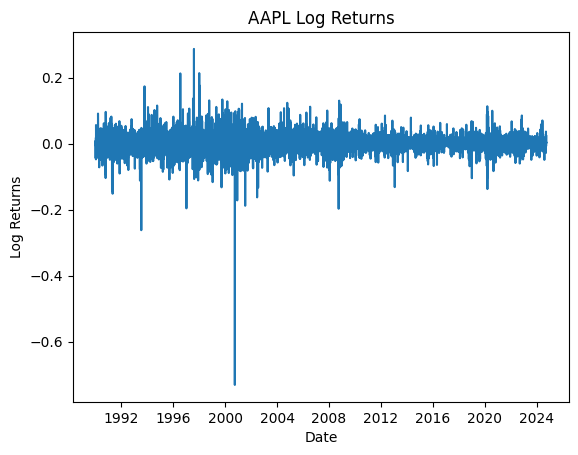

In [281]:
#plot Log_Returns
plt.plot(df_100_ret['AAPL'])
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("AAPL Log Returns")
plt.show()

          AAPL      ABBV       ABT       ACN      ADBE       AIG       AMD  \
AAPL  1.000000  0.257874  0.191180  0.369649  0.356079  0.193223  0.324917   
ABBV  0.257874  1.000000  0.437273  0.347164  0.291501  0.319247  0.165650   
ABT   0.191180  0.437273  1.000000  0.352229  0.232252  0.242267  0.181689   
ACN   0.369649  0.347164  0.352229  1.000000  0.427881  0.297269  0.336355   
ADBE  0.356079  0.291501  0.232252  0.427881  1.000000  0.207060  0.320682   
...        ...       ...       ...       ...       ...       ...       ...   
V     0.498733  0.370101  0.439324  0.532498  0.518693  0.349695  0.371159   
VZ    0.182618  0.276354  0.290286  0.314955  0.197473  0.267053  0.171758   
WFC   0.239984  0.320361  0.299005  0.358429  0.261884  0.474519  0.243414   
WMT   0.233987  0.233784  0.321942  0.290236  0.243055  0.231164  0.171537   
XOM   0.204859  0.298290  0.295077  0.364126  0.212581  0.334347  0.193038   

          AMGN       AMT      AMZN  ...       TXN       UNH    

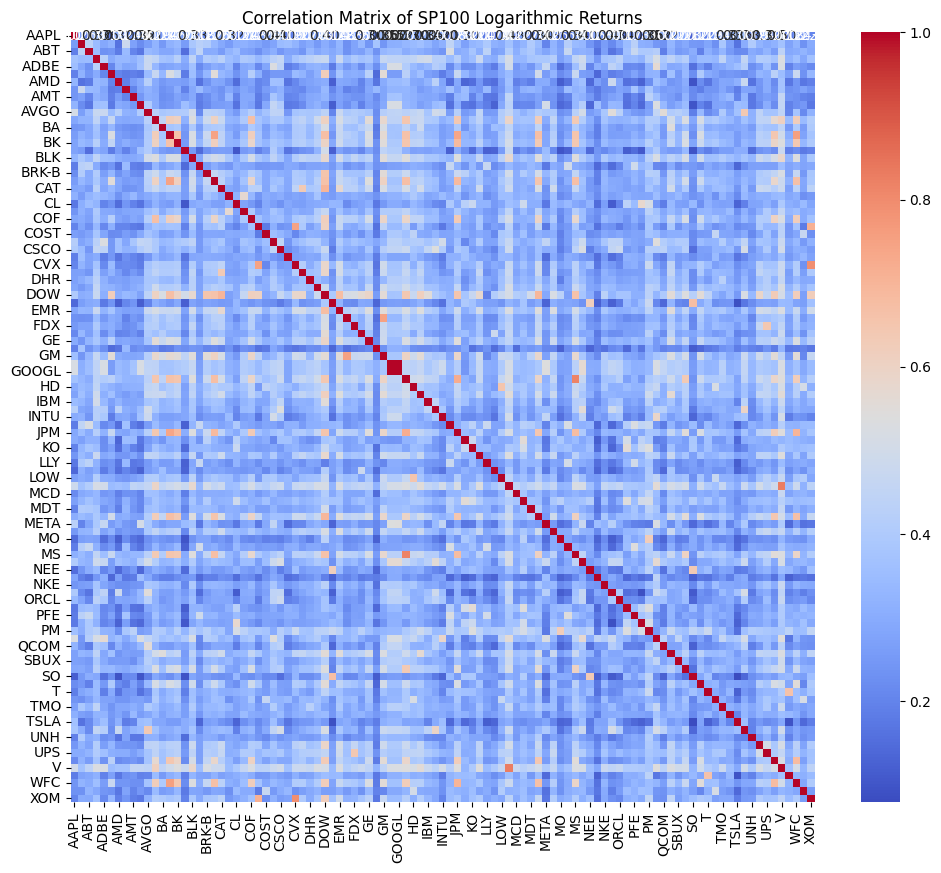

In [282]:
correlation_matrix = df_100_ret.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optional: Create a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of SP100 Logarithmic Returns')
plt.show()

In [283]:
aggreg_results=[]
for i in df_100_ret.columns:
    aggreg_results.append(aggregate_descriptive_stats(df_100_ret[i]))
aggreg_results_df=pd.DataFrame(aggreg_results)

In [284]:
aggreg_results_df[["Átlag","Variancia","Min","Max","Medián","Terjedelem","Ferdeség","Csúcsosság"]].describe()

Átlag   Variancia         Min         Max      Medián  Terjedelem  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.000524    0.000487   -0.251247    0.207362    0.000329    0.458609   
std      0.000255    0.000297    0.132379    0.092152    0.000365    0.202159   
min     -0.000146    0.000157   -0.936258    0.103055    0.000000    0.221226   
25%      0.000380    0.000280   -0.306391    0.146324    0.000000    0.306348   
50%      0.000469    0.000401   -0.220990    0.181848    0.000245    0.416848   
75%      0.000670    0.000599   -0.156860    0.234817    0.000462    0.538468   
max      0.001422    0.001512   -0.110721    0.625850    0.001451    1.443076   

         Ferdeség  Csúcsosság  
count  101.000000  101.000000  
mean    -0.278827   15.789060  
std      0.690019   18.207496  
min     -3.534429    3.797890  
25%     -0.436939    7.751826  
50%     -0.149464   10.732035  
75%      0.031802   16.104187  
max      2.378685  148.521740

In [285]:
def JB_test(returns):
    #Pearson-ból szokták számolni!
    skew=returns.dropna().skew()
    kurt=stats.kurtosis(returns.dropna(), fisher=False)
    count=returns.dropna().count()
    JB=(count/6)*(skew**2+(1/4)*(kurt-3)**2)
    p_value = 1 - stats.chi2.cdf(JB, df=2)
    return p_value

In [286]:
def KS_test(returns):
    ks_test=stats.kstest(returns.dropna(), "norm")
    return ks_test.pvalue

In [287]:
def check_significant_autocorrelation(time_series, lag,significance_level):
    # Az első lag autokorreláció kiszámítása
    lag_acf = sm.tsa.acf(time_series.dropna(), nlags=lag, fft=False)

    # Az autokorrelációs érték az első lag-nál
    acf_lag1 = lag_acf[lag]

    # A standard hiba kiszámítása a z-próbához
    n = len(time_series)
    standard_error = 1 / np.sqrt(n)

    # Z-próba az autokorreláció értékre
    z_score = acf_lag1 / standard_error

    # Kritikus érték a szignifikancia szinthez (kétoldali teszt)
    critical_value = norm.ppf(1 - significance_level / 2)

    # Szignifikancia vizsgálat
    if np.abs(z_score) > critical_value:
        return True  # Van szignifikáns autokorreláció
    else:
        return False  # Nincs szignifikáns autokorreláció ez mindig false

In [288]:
def apply_more_tests(col, lag, sig):
    jb_result = JB_test(col)  # JB test alkalmazása
    ks_result = KS_test(col)  # KS test alkalmazása
    ac_result = check_significant_autocorrelation(col, lag, sig)  # Autokorreláció teszt alkalmazása

    return jb_result, ks_result, ac_result

In [289]:
result_df = df_100_ret.apply(lambda col: apply_more_tests(col,3,0.1))
result_df = result_df.rename(index={0: 'JB_test_result',1: 'KS_test_result' ,2: 'Autocorrelation_result'})
result_df=result_df.T
result_df

JB_test_result KS_test_result Autocorrelation_result
AAPL            0.0            0.0                  False
ABBV            0.0            0.0                  False
ABT             0.0            0.0                   True
ACN             0.0            0.0                  False
ADBE            0.0            0.0                  False
...             ...            ...                    ...
V               0.0            0.0                   True
VZ              0.0            0.0                   True
WFC             0.0            0.0                   True
WMT             0.0            0.0                   True
XOM             0.0            0.0                  False

[101 rows x 3 columns]

In [290]:
result_df.describe()

JB_test_result  KS_test_result Autocorrelation_result
count            101.0           101.0                    101
unique             1.0             2.0                      2
top                0.0             0.0                  False
freq             101.0           100.0                     62

In [291]:
result_df['Autocorrelation_result'].sum()

39

In [292]:
(result_df['JB_test_result'] > 0).sum()

0

In [293]:
result_df[result_df['JB_test_result'] > 0]

Empty DataFrame
Columns: [JB_test_result, KS_test_result, Autocorrelation_result]
Index: []

In [294]:
(result_df['KS_test_result'] > 0).sum()

1

In [295]:
result_df[(result_df['KS_test_result'] > 0)]

JB_test_result KS_test_result Autocorrelation_result
DOW            0.0            0.0                  False

In [296]:
apply_more_tests(df_100_ret["DOW"],3,0.1)

(0.0, 3.3817679249888916e-281, False)

In [317]:
def vol_clust_test(col,sign):
    squared_results=MS_df['Log_Returns'].pow(2)
    ljungbox = sm.stats.acorr_ljungbox(col.dropna(), lags=[1], return_df=True)
    engle_result = engle(MS_df['Squared_Log_Returns'][1:].dropna(), nlags=1)
    engle_p=engle_result[1]
    return ljungbox['lb_pvalue'].iloc[0]>sign,engle_p>sign


In [298]:
result_df = df_100_ret.apply(lambda col: vol_clust_test(col,0.1))
result_df = result_df.rename(index={0: 'Ljung-Box Teszt szignifikáns',1: 'Engle-féle GARCH Szignifikáns'})
result_df=result_df.T
result_df

Ljung-Box Teszt szignifikáns  Engle-féle GARCH Szignifikáns
AAPL                          True                          False
ABBV                          True                          False
ABT                          False                          False
ACN                          False                          False
ADBE                         False                          False
...                            ...                            ...
V                            False                          False
VZ                           False                          False
WFC                          False                          False
WMT                          False                          False
XOM                          False                          False

[101 rows x 2 columns]

In [299]:
result_df.describe()

Ljung-Box Teszt szignifikáns Engle-féle GARCH Szignifikáns
count                           101                           101
unique                            2                             1
top                           False                         False
freq                             65                           101

In [300]:
sum(result_df["Engle-féle GARCH Szignifikáns"]!=result_df["Ljung-Box Teszt szignifikáns"])

36

In [301]:
(result_df['Ljung-Box Teszt szignifikáns'] >0.01).sum()

36

In [302]:
result_df.loc[result_df["Ljung-Box Teszt szignifikáns"]>0.05]

Ljung-Box Teszt szignifikáns  Engle-féle GARCH Szignifikáns
AAPL                           True                          False
ABBV                           True                          False
AMD                            True                          False
AMZN                           True                          False
BAC                            True                          False
BMY                            True                          False
BRK-B                          True                          False
CAT                            True                          False
CHTR                           True                          False
CL                             True                          False
COST                           True                          False
DE                             True                          False
DHR                            True                          False
DOW                            True                          False
F                              True                          False
FDX                            True                          False
GD                             True                          False
GE                             True                          False
GM                             True                          False
GOOG                           True                          False
GOOGL                          True                          False
HD                             True                          False
HON                            True                          False
JNJ                            True                          False
KO                             True                          False
MDT                            True                          False
META                           True                          False
MRK                            True                          False
MS                             True                          False
NKE                            True                          False
NVDA                           True                          False
PFE                            True                          False
TMO                            True                          False
TSLA                           True                          False
TXN                            True                          False
UNH                            True                          False

In [303]:
def find_best_garch_order(data, max_p=5, max_q=5, criterion='aic'):
    best_aic = np.inf
    best_bic = np.inf
    best_order = None
    
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                model = arch_model(data, vol='Garch', p=p, q=q)
                fit = model.fit(disp='off')
                aic = fit.aic
                bic = fit.bic
                if criterion == 'aic' and aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                elif criterion == 'bic' and bic < best_bic:
                    best_bic = bic
                    best_order = (p, q)
                    
            except Exception as e:
                print(f"Model (p={p}, q={q}) failed to fit: {e}")

    return best_order, best_aic if criterion == 'aic' else best_bic


In [306]:
from arch import arch_model

garch_model = arch_model(df_100_ret["AAPL"].dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
alpha_p_value = garch_fit.pvalues['alpha[1]']
beta_p_value = garch_fit.pvalues['beta[1]']


c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007453. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [307]:
def garchtesting(col,sign):
    from arch import arch_model
    optimal_order, optimal_criterion_value = find_best_garch_order(col.dropna(), max_p=5, max_q=5, criterion='aic')
    garch_model = arch_model(col.dropna(), vol='Garch', p=optimal_order[0], q=optimal_order[1])
    garch_fit = garch_model.fit(disp='off')
    alpha_p_value = garch_fit.pvalues['alpha[1]']
    beta_p_value = garch_fit.pvalues['beta[1]']
    return 1*(alpha_p_value<sign)*(beta_p_value<sign)

In [308]:
GARCH_p_lst=df_100_ret.apply(lambda col: garchtesting(col,0.01))


c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007453. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Felhasználó\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007453. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\U

In [320]:
GARCH_df=pd.DataFrame(GARCH_p_lst).T

In [ ]:
garch_selection=[]
for i in range(len(GARCH_p_lst)):
    if GARCH_p_lst[i]=1

AAPL    1
ABBV    0
ABT     0
ACN     1
ADBE    1
AIG     1
AMD     0
AMGN    0
AMT     0
AMZN    0
dtype: int32

In [ ]:
GARCH_df.loc[""]

17